## Step 1: Install Required Libraries
First, we need to install the required libraries.

In [2]:
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install tensorflow
!pip install tensorflowjs
!pip install scikit-learn
!pip install opencv-python-headless

## Step 2: Import Libraries
We will import the necessary libraries for data handling, visualization, and model training.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.utils import to_categorical

from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Step 3: Load the Dataset
Load the dataset from the specified path in Google Drive.

In [3]:
# Change this path to your dataset location in Google Drive
data_path = '/content/drive/MyDrive/Colab Notebooks/LexiLearn_Machine_Learning/data/A_Z Handwritten Data.csv'

# Load the data
data = pd.read_csv(data_path).astype('float32')

print(data.head(10))

     0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  ...  0.639  0.640  0.641  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0   
5  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0   
6  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0   
7  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0   
8  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0   
9  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0   

   0.642  0.643  0.644  0.645  0.646  0.647  0.648  
0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  
1 

## Step 4: Preprocess the Data
Separate the features and labels, then reshape the data appropriately.

In [4]:
# Separate features and labels
X = data.drop('0', axis=1)
y = data['0']

# Split data into training and test sets
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.2)

# Reshape data to be suitable for CNN input
train_x = np.reshape(train_x.values, (train_x.shape[0], 28, 28, 1))
test_x = np.reshape(test_x.values, (test_x.shape[0], 28, 28, 1))

# Normalization
train_X = train_x.astype('float32') / 255.0
test_X = test_x.astype('float32') / 255.0

print("Train data shape: ", train_X.shape)
print("Test data shape: ", test_X.shape)

Train data shape:  (297960, 28, 28, 1)
Test data shape:  (74490, 28, 28, 1)


## Step 5: Visualize Data Distribution
Visualize the distribution of each class in the dataset.

<ipython-input-5-7847c2aa642c>:5: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  y_int = np.int0(y)


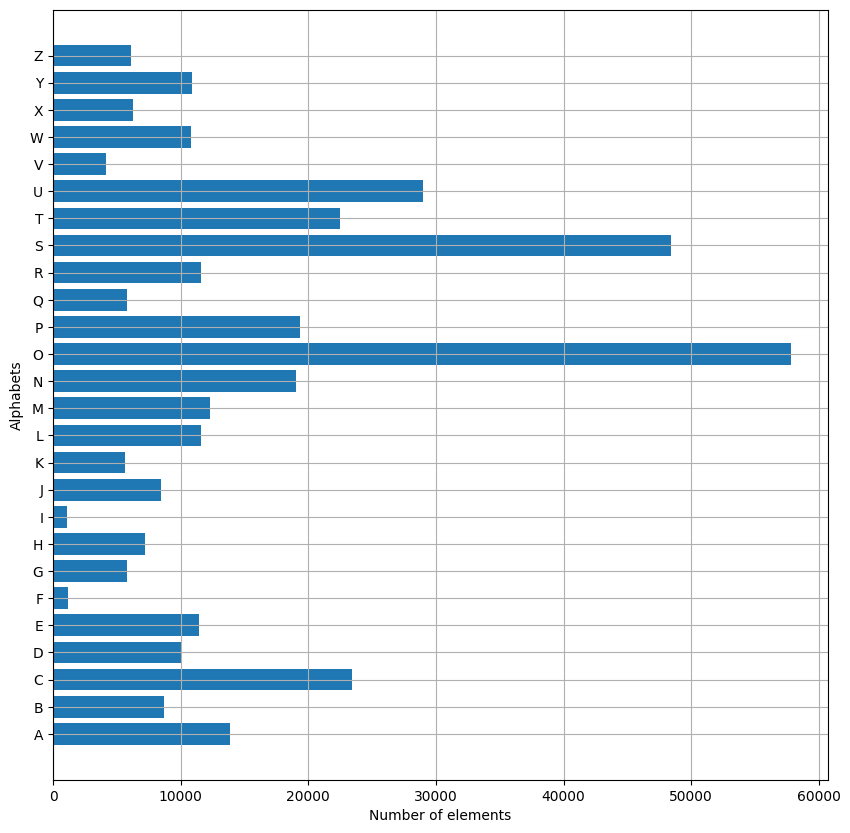

In [5]:
# Create a dictionary to map labels to letters
word_dict = {0:'A',1:'B',2:'C',3:'D',4:'E',5:'F',6:'G',7:'H',8:'I',9:'J',10:'K',11:'L',12:'M',13:'N',14:'O',15:'P',16:'Q',17:'R',18:'S',19:'T',20:'U',21:'V',22:'W',23:'X',24:'Y',25:'Z'}

# Count the number of samples for each class
y_int = np.int0(y)
count = np.zeros(26, dtype='int')
for i in y_int:
    count[i] += 1

alphabets = list(word_dict.values())

# Plot the distribution
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.barh(alphabets, count)

plt.xlabel("Number of elements")
plt.ylabel("Alphabets")
plt.grid()
plt.show()

## Step 6: Visualize Sample Images
Shuffle and display a few sample images.

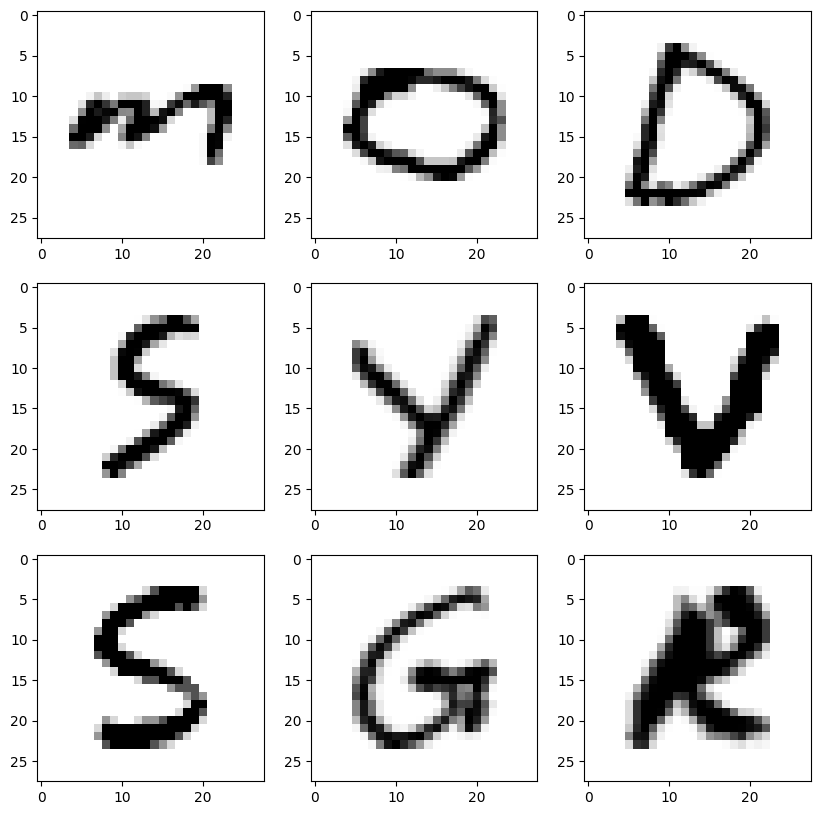

In [8]:
# Shuffle and display a few sample images
shuff = shuffle(train_x[:100])

fig, ax = plt.subplots(3, 3, figsize=(10, 10))
axes = ax.flatten()

for i in range(9):
    _, shu = cv2.threshold(shuff[i], 30, 200, cv2.THRESH_BINARY)
    axes[i].imshow(np.reshape(shuff[i], (28, 28)), cmap="Greys")
plt.show()

## Step 7: Reshape and One-hot Encode Labels
Reshape data to include a channel dimension and one-hot encode the labels.

In [9]:
# Reshape data to include a channel dimension
train_X = train_x.reshape(train_x.shape[0], train_x.shape[1], train_x.shape[2], 1)
test_X = test_x.reshape(test_x.shape[0], test_x.shape[1], test_x.shape[2], 1)

print("New shape of train data: ", train_X.shape)
print("New shape of test data: ", test_X.shape)

# One-hot encode labels
train_yOHE = to_categorical(train_y, num_classes=26)
test_yOHE = to_categorical(test_y, num_classes=26)

print("New shape of train labels: ", train_yOHE.shape)
print("New shape of test labels: ", test_yOHE.shape)

New shape of train data:  (297960, 28, 28, 1)
New shape of test data:  (74490, 28, 28, 1)
New shape of train labels:  (297960, 26)
New shape of test labels:  (74490, 26)


## Step 8: Build and Compile the Model
Build the CNN model.

In [10]:
model = Sequential([
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPool2D(pool_size=(2, 2), strides=2),
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'),
    MaxPool2D(pool_size=(2, 2), strides=2),
    Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding='valid'),
    MaxPool2D(pool_size=(2, 2), strides=2),
    Flatten(),
    Dense(64, activation="relu"),
    # Dropout(0.25),  # Dropout layer should be here
    Dense(128, activation="relu"),
    Dense(26, activation="softmax")
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## Step 9: Train the Model
Train the model using the training data.

In [11]:
# Train the model
history = model.fit(train_x, train_yOHE, epochs=10, validation_data=(test_x, test_yOHE))

# Print training and validation metrics
print("The validation accuracy is:", history.history['val_accuracy'])
print("The training accuracy is:", history.history['accuracy'])
print("The validation loss is:", history.history['val_loss'])
print("The training loss is:", history.history['loss'])

# Evaluasi model pada data training
train_loss, train_acc = model.evaluate(train_X, train_yOHE, verbose=0)
print(f"Training Accuracy: {train_acc:.4f}")

# Evaluasi model pada data validasi
val_loss, val_acc = model.evaluate(test_X, test_yOHE, verbose=0)
print(f"Validation Accuracy: {val_acc:.4f}")

Epoch 1/10
9312/9312 ━━━━━━━━━━━━━━━━━━━━ 38s 4ms/step - accuracy: 0.9051 - loss: 0.4141 - val_accuracy: 0.9759 - val_loss: 0.0841
Epoch 2/10
9312/9312 ━━━━━━━━━━━━━━━━━━━━ 35s 3ms/step - accuracy: 0.9784 - loss: 0.0759 - val_accuracy: 0.9818 - val_loss: 0.0679
Epoch 3/10
9312/9312 ━━━━━━━━━━━━━━━━━━━━ 31s 3ms/step - accuracy: 0.9832 - loss: 0.0612 - val_accuracy: 0.9759 - val_loss: 0.0870
Epoch 4/10
9312/9312 ━━━━━━━━━━━━━━━━━━━━ 42s 3ms/step - accuracy: 0.9849 - loss: 0.0554 - val_accuracy: 0.9852 - val_loss: 0.0542
Epoch 5/10
9312/9312 ━━━━━━━━━━━━━━━━━━━━ 40s 3ms/step - accuracy: 0.9862 - loss: 0.0517 - val_accuracy: 0.9824 - val_loss: 0.0712
Epoch 6/10
9312/9312 ━━━━━━━━━━━━━━━━━━━━ 41s 3ms/step - accuracy: 0.9866 - loss: 0.0499 - val_accuracy: 0.9818 - val_loss: 0.0756
Epoch 7/10
9312/9312 ━━━━━━━━━━━━━━━━━━━━ 41s 3ms/step - accuracy: 0.9873 - loss: 0.0479 - val_accuracy: 0.9840 - val_loss: 0.0672
Epoch 8/10
9312/9312 ━━━━━━━━━━━━━━━━━━━━ 42s 3ms/step - accuracy: 0.9880 - loss: 0

## Step 10: Visualize Training Process
Plot the training and validation accuracy and loss.

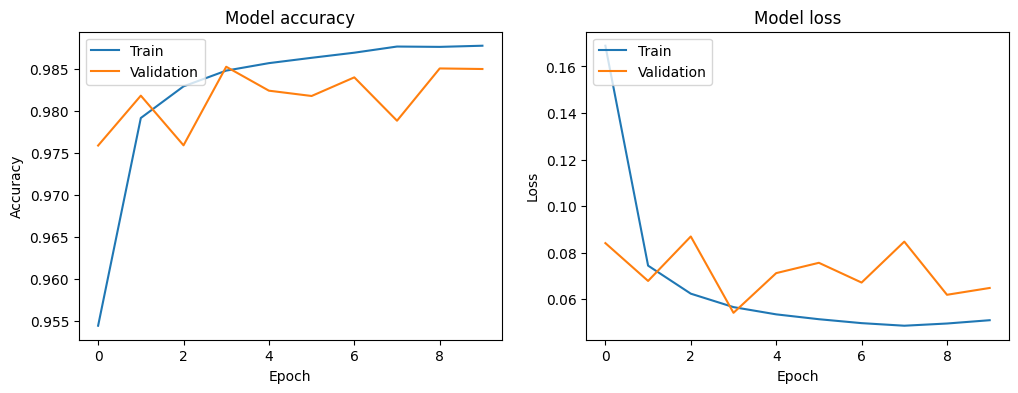

In [14]:
# Plot training & validation accuracy and loss values
plt.figure(figsize=(12, 4))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

2328/2328 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step
Accuracy on Test Data: 0.9850


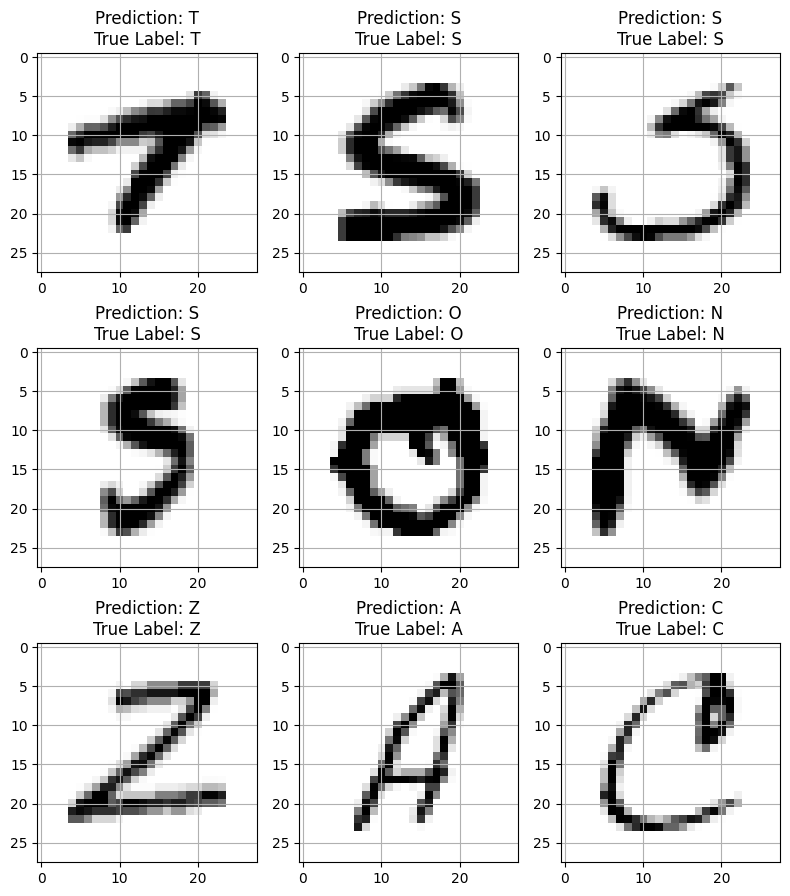

Predicted label: 19, True label: 19
Predicted label: 18, True label: 18
Predicted label: 18, True label: 18
Predicted label: 18, True label: 18
Predicted label: 14, True label: 14
Predicted label: 13, True label: 13
Predicted label: 25, True label: 25
Predicted label: 0, True label: 0
Predicted label: 2, True label: 2
Predicted label: 19, True label: 19


In [15]:
# Prediksi pada data uji
predictions = model.predict(test_X)

# Ambil indeks label dengan probabilitas tertinggi untuk setiap sampel
predicted_labels = np.argmax(predictions, axis=1)

# Bandingkan dengan label sebenarnya
true_labels = np.argmax(test_yOHE, axis=1)

# Hitung akurasi
accuracy = np.mean(predicted_labels == true_labels)
print(f"Accuracy on Test Data: {accuracy:.4f}")

# Tampilkan beberapa gambar dari data uji dengan label prediksi
fig, axes = plt.subplots(3, 3, figsize=(8, 9))
axes = axes.flatten()

for i, ax in enumerate(axes):
    img = np.reshape(test_X[i], (28, 28))
    ax.imshow(img, cmap="Greys")

    pred = word_dict[predicted_labels[i]]
    true_label = word_dict[true_labels[i]]

    ax.set_title(f"Prediction: {pred}\nTrue Label: {true_label}")
    ax.grid()

plt.tight_layout()
plt.show()

# Debugging: Print first few predictions and true labels
for i in range(10):
    print(f"Predicted label: {predicted_labels[i]}, True label: {true_labels[i]}")

## Step 11: Confusion Matrix
Generate and display the confusion matrix.

2328/2328 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step


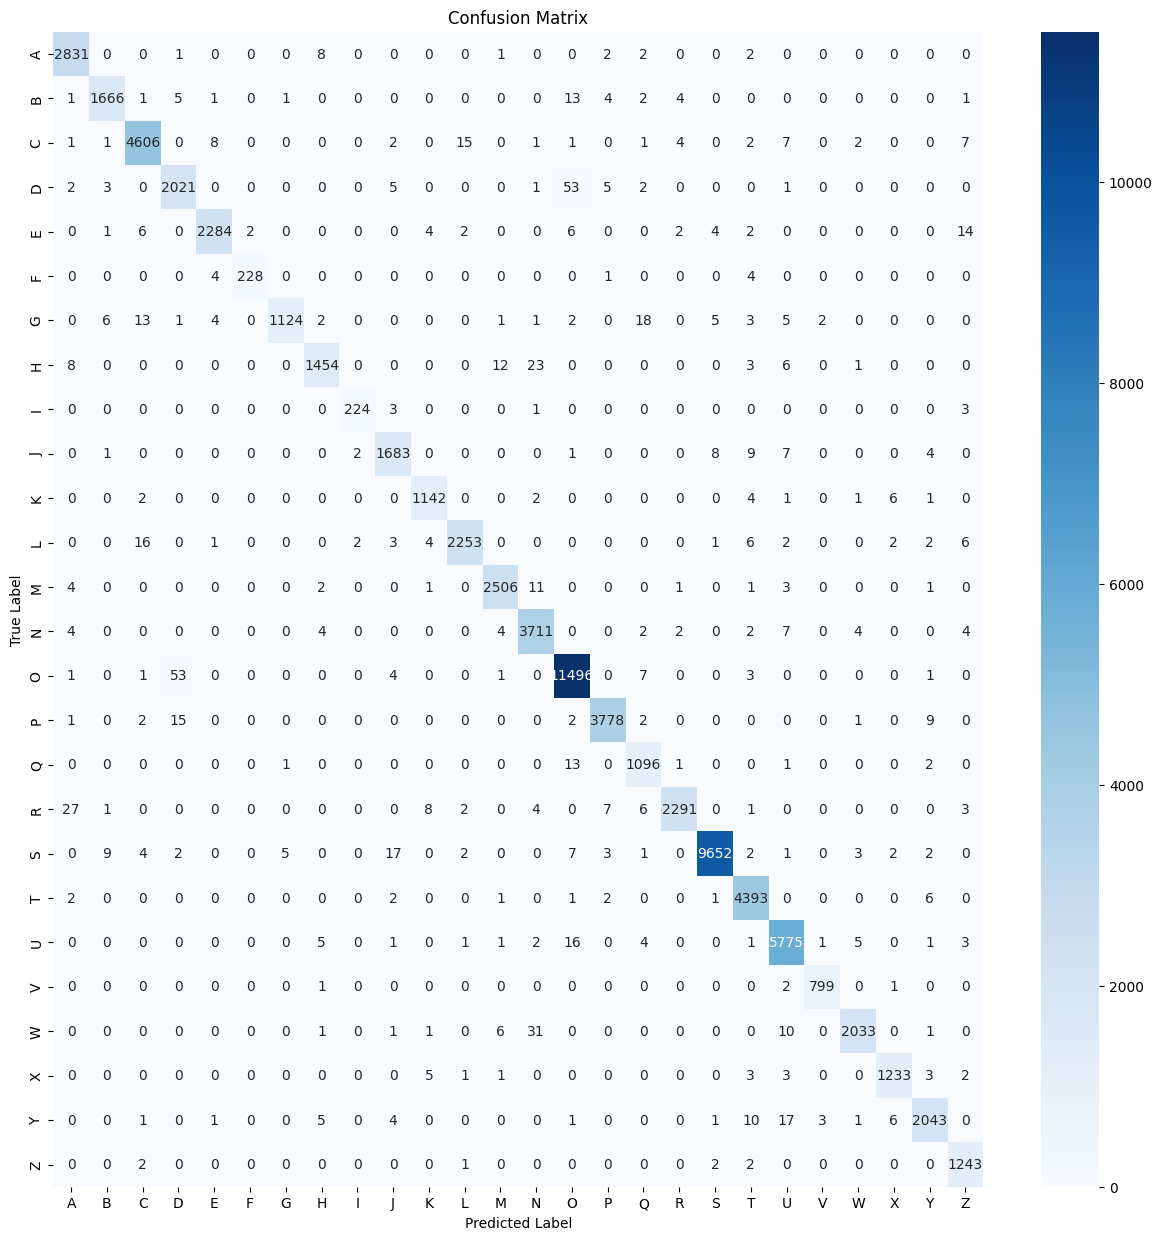

In [13]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, f1_score

# Generate confusion matrix
y_pred = model.predict(test_x)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(test_yOHE, axis=1)

cm = confusion_matrix(y_true, y_pred_classes)

plt.figure(figsize=(15, 15))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=alphabets, yticklabels=alphabets)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

## Step 12: F1-Score
Calculate and print the F1-score.

In [14]:
# Calculate F1-score
f1 = f1_score(y_true, y_pred_classes, average='weighted')
f1_per_class = f1_score(y_true, y_pred_classes, average=None)

print(f"Weighted F1-score: {f1}")
for i, score in enumerate(f1_per_class):
    print(f"F1-score for class {alphabets[i]}: {score}")

Weighted F1-score: 0.9875749078126754
F1-score for class A: 0.9883051143305986
F1-score for class B: 0.9837614408030706
F1-score for class C: 0.9892611683848798
F1-score for class D: 0.9644476258649487
F1-score for class E: 0.986609071274298
F1-score for class F: 0.9764453961456103
F1-score for class G: 0.9698015530629853
F1-score for class H: 0.9729006356641017
F1-score for class I: 0.9760348583877996
F1-score for class J: 0.9784883720930232
F1-score for class K: 0.9827882960413081
F1-score for class L: 0.9849180327868852
F1-score for class M: 0.9897314375987363
F1-score for class N: 0.9853956452469463
F1-score for class O: 0.9919323525605074
F1-score for class P: 0.9926431949553337
F1-score for class Q: 0.971200708905627
F1-score for class R: 0.9843179377013964
F1-score for class S: 0.9957701434024554
F1-score for class T: 0.9915359440243765
F1-score for class U: 0.9902263374485597
F1-score for class V: 0.9937810945273632
F1-score for class W: 0.9833131801692865
F1-score for class X:

## Step 13: Save the Model
Save the trained model for future use.

In [15]:
# Define path to save the model
model_save_path = '/content/drive/MyDrive/Colab-Notebooks/LexiLearn_Machine_Learning/data/az-models/az_model.h5'

# Save the model
model.save(model_save_path)
print(f"Model saved to: {model_save_path}")

Model saved to: /content/drive/MyDrive/Colab-Notebooks/LexiLearn_Machine_Learning/data/az-models/az_model.h5


## Step 14: Predict Uploaded Image
Upload an image and make a prediction.

Saving Screenshot 2024-06-21 at 10.08.55.png to Screenshot 2024-06-21 at 10.08.55 (2).png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


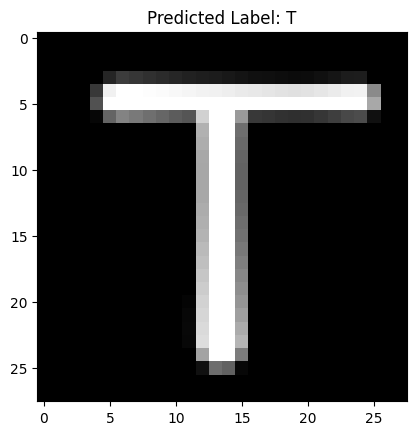

In [22]:
import numpy as np
from google.colab import files
from PIL import Image
import matplotlib.pyplot as plt
from keras.models import load_model

# Function to preprocess the uploaded image
def preprocess_image(image_path):
    img = Image.open(image_path).convert('L')  # Convert to grayscale
    img = img.resize((28, 28))  # Resize to 28x28 pixels
    img = np.array(img)
    img = img.astype('float32') / 255.  # Normalize pixel values
    img = np.expand_dims(img, axis=-1)  # Add batch dimension
    img = np.expand_dims(img, axis=0)   # Add channel dimension for grayscale
    return img

# Load the saved model
model_path = '/content/drive/MyDrive/Colab-Notebooks/LexiLearn_Machine_Learning/data/az-models/az_model.h5'
model = load_model(model_path)

# Upload an image
uploaded = files.upload()

# Define your word_dict here
word_dict = {0:'A', 1:'B', 2:'C', 3:'D', 4:'E', 5:'F', 6:'G', 7:'H', 8:'I', 9:'J',
             10:'K', 11:'L', 12:'M', 13:'N', 14:'O', 15:'P', 16:'Q', 17:'R', 18:'S',
             19:'T', 20:'U', 21:'V', 22:'W', 23:'X', 24:'Y', 25:'Z'}

for fn in uploaded.keys():
    # Preprocess the image
    img = preprocess_image(fn)

    # Predict the letter
    prediction = model.predict(img)
    predicted_index = np.argmax(prediction)  # Get the index of the highest probability
    predicted_label = word_dict[predicted_index]  # Convert index to corresponding letter

    # Display the image and prediction
    plt.imshow(img[0, :, :, 0], cmap=plt.cm.binary)
    plt.title(f'Predicted Label: {predicted_label}')
    plt.show()